In [1]:
import sys
sys.path.append("/home/hawk31/graph-attribution/")
sys.path.append("/home/hawk31/xaibench_tf/")

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import dill

In [5]:
from xaibench.utils import LOG_PATH, BLOCK_TYPES
from glob import glob
from tqdm import tqdm

rmses = {}
rs = {}


for bt in BLOCK_TYPES:
    logs = glob(os.path.join(LOG_PATH, f"{bt}_*.pt"))
    for log in tqdm(logs):
        with open(log, "rb") as handle:
            perf = dill.load(handle)
        rmses.setdefault(bt, []).append(perf["rmse_train"][-1])
        rs.setdefault(bt, []).append(perf["rs_train"][-1])

100%|██████████| 997/997 [00:00<00:00, 6267.93it/s]


In [6]:
logs_rf = glob(os.path.join(LOG_PATH, "*rf*"))

rmses["rf"] = []
rs["rf"] = []

for log in logs_rf:
    with open(log, "rb") as handle:
        rmse, r = dill.load(handle)
        
        rmses["rf"].append(rmse)
        rs["rf"].append(r)

In [7]:
pytorch_logs = glob("/home/hawk31/xaibench/logs/*_metrics_noglobal.pt")
print(len(pytorch_logs))

737


In [8]:
rmses["mpnn_pytorch"] = []
rs["mpnn_pytorch"] = []

for log in pytorch_logs:
    with open(log, "rb") as handle:
        res = dill.load(handle)
        rmses["mpnn_pytorch"].append(res[0][0])
        rs["mpnn_pytorch"].append(res[1][0])

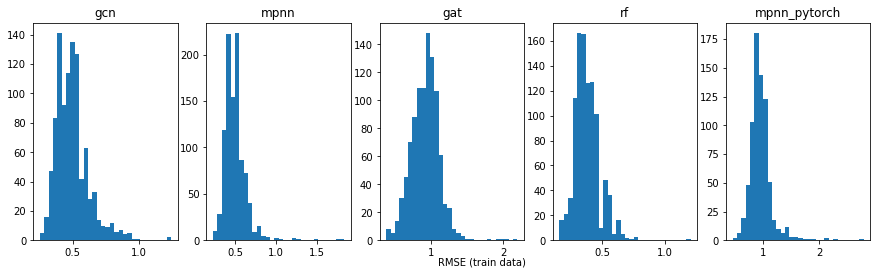

In [9]:
from xaibench.utils import FIG_PATH

f, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
for idx, bt in enumerate(BLOCK_TYPES + ["rf", "mpnn_pytorch"]):
    axs[idx].hist(rmses[bt], bins=30)
    axs[idx].set_title(bt)

f.text(0.5, 0.04, "RMSE (train data)")
plt.show()
#plt.savefig(os.path.join(FIG_PATH, "rmse_methods.png"))
#plt.close()

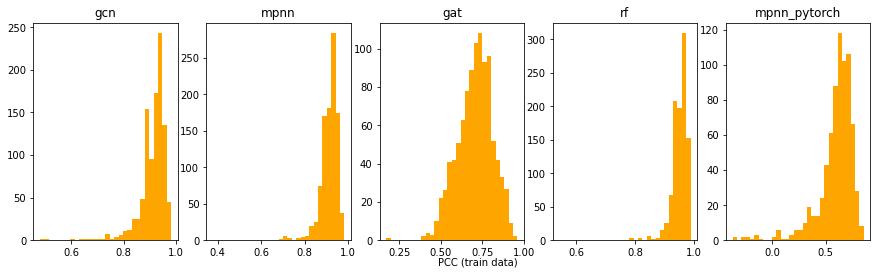

In [10]:
f, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
for idx, bt in enumerate(BLOCK_TYPES + ["rf", "mpnn_pytorch"]):
    axs[idx].hist(rs[bt], bins=30, color="orange")
    axs[idx].set_title(bt)

f.text(0.5, 0.04, "PCC (train data)")
plt.show()
# plt.savefig(os.path.join(FIG_PATH, "rs_methods.png"))
# plt.close()